In [1]:
#getting all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
#get dataset 
price_data = pd.read_csv("C:\\Users\\U6080693\\OneDrive - London Stock Exchange Group\\Desktop\\Mini Hackathon\\data\\carprice_data_cleaned.csv")

*checking the distribution of various categorical features*

In [5]:

corr = price_data.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\U6080693\AppData\Local\Temp\ipykernel_17136\2284446633.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_data.corr()


,year,km_driven,mileage,engine_cc,max_power_bhp,seats,selling_price
year,1.000000,-0.418006,0.329145,0.018848,0.226320,-0.009144,0.414092
km_driven,-0.418006,1.000000,-0.173073,0.205914,-0.038075,0.227336,-0.225534
mileage,0.329145,-0.173073,1.000000,-0.575831,-0.374621,-0.452085,-0.126054
engine_cc,0.018848,0.205914,-0.575831,1.000000,0.703975,0.610309,0.455734
max_power_bhp,0.226320,-0.038075,-0.374621,0.703975,1.000000,0.191999,0.748489
seats,-0.009144,0.227336,-0.452085,0.610309,0.191999,1.000000,0.041358
selling_price,0.414092,-0.225534,-0.126054,0.455734,0.748489,0.041358,1.000000


' combine test drive car and forth and above into one '

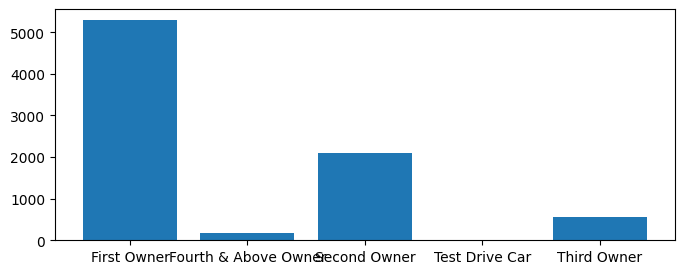

In [6]:
""" type of owner count. test drive car and forth&above owner data is negligible"""
data = price_data.groupby(['owner']).count().Car.reset_index()
plt.figure(figsize=(8,3))
plt.bar(data['owner'],data['Car'])

""" combine test drive car and forth and above into one """

     fuel   Car  percentage
0     CNG    57    0.701280
1  Diesel  4402   54.158465
2     LPG    38    0.467520
3  Petrol  3631   44.672736


' combine CNG and LPG into one as others/Gas'

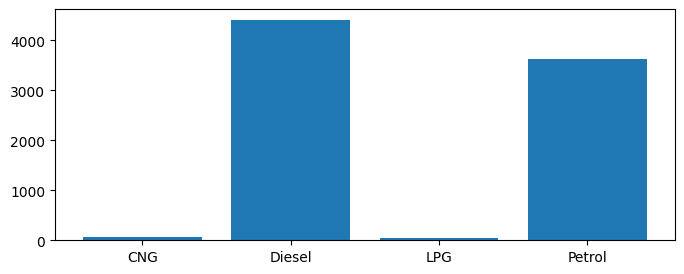

In [7]:
""" In fuel type, CNG and LPG are less than 1% of data """
data = price_data.groupby(['fuel']).count().Car.reset_index()
data["percentage"]= data['Car']*100/data['Car'].sum()
print(data)
plt.figure(figsize=(8,3))
plt.bar(data['fuel'],data['Car'])   

""" combine CNG and LPG into one as others/Gas"""

        seller_type   Car
0            Dealer  1126
1        Individual  6766
2  Trustmark Dealer   236


' experiment by combining dealers into one category'

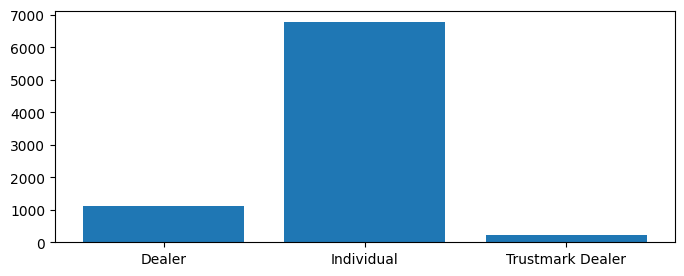

In [8]:
data = price_data.groupby(['seller_type']).count().Car.reset_index()
print(data)
plt.figure(figsize=(8,3))
plt.bar(data['seller_type'],data['Car'])

""" experiment by combining dealers into one category"""

<BarContainer object of 29 artists>

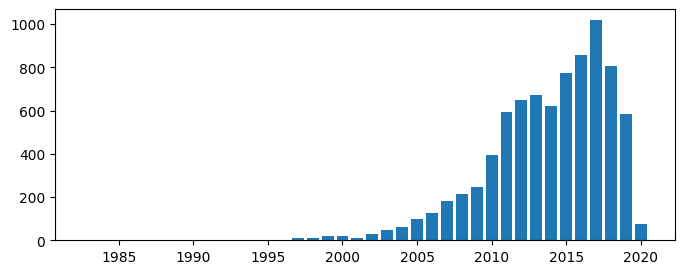

In [9]:
data = price_data.groupby(['year']).count().Car.reset_index()
plt.figure(figsize=(8,3))
plt.bar(data['year'],data['Car'])

   seats   Car
0    2.0     2
1    4.0   133
2    5.0  6254
3    6.0    62
4    7.0  1120
5    8.0   236
6    9.0    80
7   10.0    19
8   14.0     1


' combine 9 10 14 and 2 seaters into one'

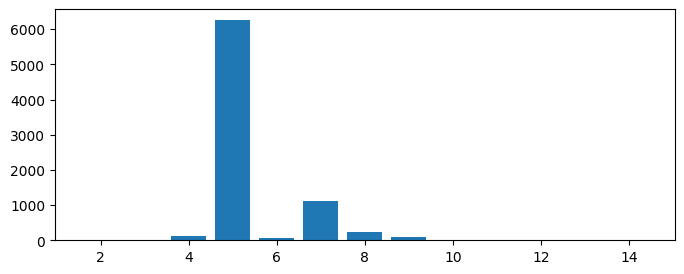

In [10]:
data = price_data.groupby(['seats']).count().Car.reset_index()
print(data)
plt.figure(figsize=(8,3))
plt.bar(data['seats'],data['Car'])
""" combine 9 10 14 and 2 seaters into one"""

          Company  Car
23         Nissan   81
13         Jaguar   71
31          Volvo   67
6          Datsun   65
21  Mercedes-Benz   54
7            Fiat   47
2            Audi   40
17          Lexus   34
14           Jeep   31
22     Mitsubishi   14
16           Land    6
8           Force    6
12          Isuzu    5
15            Kia    4
0      Ambassador    4
18             MG    3
5          Daewoo    3
24           Opel    1
25        Peugeot    1
1           Ashok    1


' combine car companies having count <100 into others'

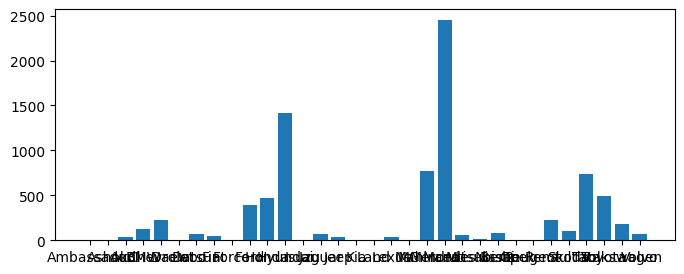

In [11]:
data = price_data.groupby(['Company']).count().Car.reset_index()
print(data.sort_values(by='Car', ascending=False).query('Car<100'))
plt.figure(figsize=(8,3))
plt.bar(data['Company'],data['Car'])

""" combine car companies having count <100 into others"""

       index  transmission
0     Manual          7078
1  Automatic          1050


' no problems here in the transmission category '

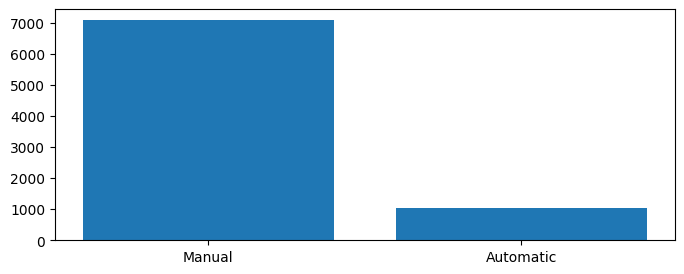

In [12]:
data = price_data['transmission'].value_counts().reset_index()
print(data)
plt.figure(figsize=(8,3))
plt.bar(data['index'],data['transmission'])

""" no problems here in the transmission category """

' engine_cc left skewed data, might need to apply transform '

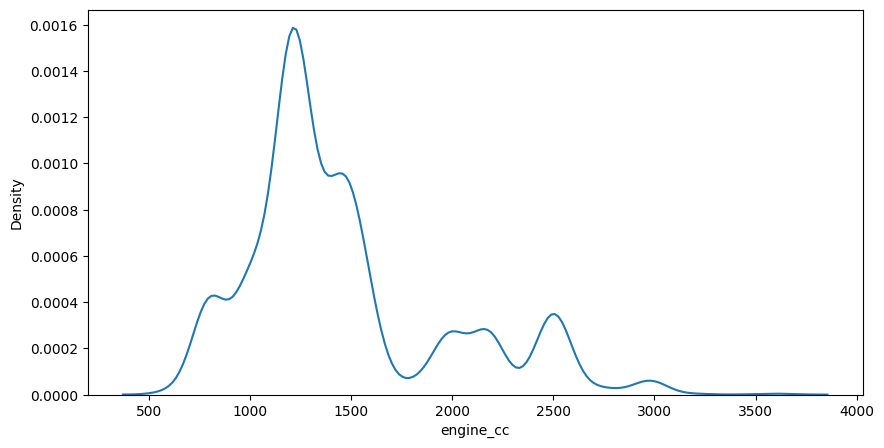

In [13]:

plt.figure(2,figsize=(10,5))

#plt.subplot(1,2,1)
#sns.lineplot(x=price_data['engine_cc'].value_counts())
sns.kdeplot(price_data['engine_cc'])
""" engine_cc left skewed data, might need to apply transform """

' power_bhp left skewed data, might need to apply transform '

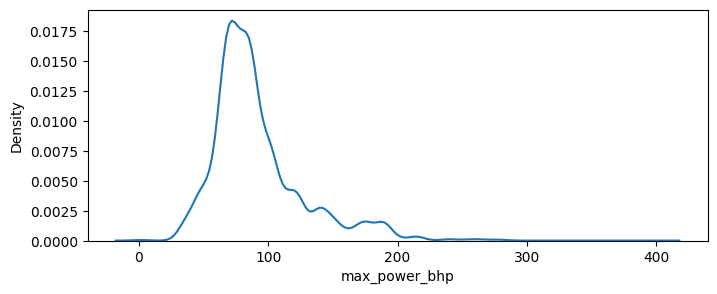

In [14]:
plt.figure(figsize=(8,3))
sns.kdeplot(x=price_data['max_power_bhp'])
""" power_bhp left skewed data, might need to apply transform """

'mileage dist almost normal '

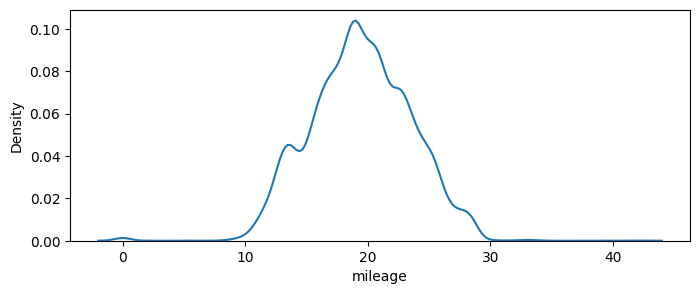

In [15]:
plt.figure(figsize=(8,3))
sns.kdeplot(x=price_data['mileage'])

"""mileage dist almost normal """

' km-driven dist highly right skewwed '

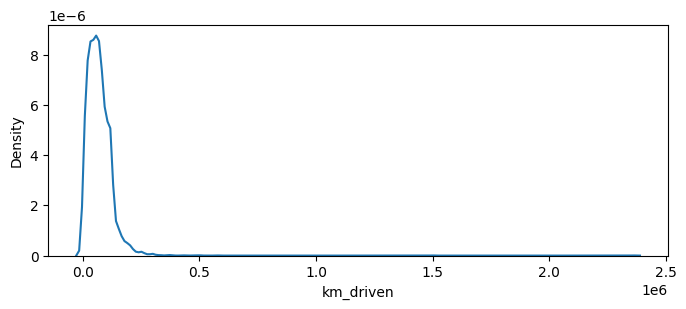

In [16]:
plt.figure(figsize=(8,3))
sns.kdeplot(x=price_data['km_driven'])

""" km-driven dist highly right skewwed """

In [17]:
price_data.columns

Index(['Company', 'Car', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine_cc', 'max_power_bhp',
       'torque', 'seats', 'selling_price'],
      dtype='object')

In [18]:
price_data['seats'] = price_data['seats'].astype('Int64')

In [19]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        8128 non-null   object 
 1   Car            8128 non-null   object 
 2   year           8128 non-null   int64  
 3   km_driven      8128 non-null   float64
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine_cc      7907 non-null   float64
 10  max_power_bhp  7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   Int64  
 13  selling_price  8128 non-null   float64
dtypes: Int64(1), float64(5), int64(1), object(7)
memory usage: 897.1+ KB


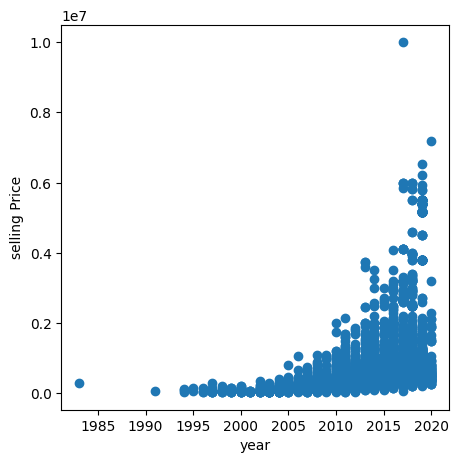

In [20]:
plt.figure(figsize=(5,5))
plt.xlabel("year")
plt.ylabel("selling Price")
plt.scatter(price_data["year"], price_data['selling_price'])

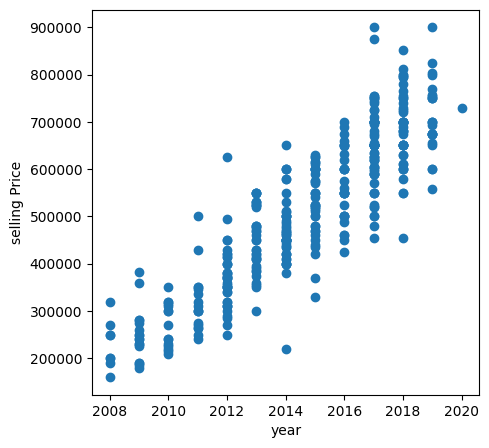

In [21]:

plt.figure(figsize=(5,5))
plt.xlabel("year")
plt.ylabel("selling Price")
plt.scatter(price_data[price_data["Car"]=="Maruti Swift Dzire"]["year"], price_data[price_data["Car"]=="Maruti Swift Dzire"]["selling_price"])